# 合成コントロール法

In [34]:
import pandas as pd
import numpy as np
import gpboost as gpb
from patsy import dmatrices, dmatrix
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
path = '../../../../data/processed/df_exclude_already_treated.xlsx'
df = pd.read_excel(path)
df['log_pop'] = np.log(df['population'])

In [36]:
control_df = df[df['after_treatment'] == 0]
control_df = control_df.dropna()

treatment_df = df[df['treatment_group'] == 1]
treatment_df = treatment_df.dropna()

In [37]:
formula = 'C(year)'
y = control_df['log_pop']
X = dmatrix(formula, data=control_df, return_type='dataframe')
group = control_df['island_ids']

In [38]:
gp_model = gpb.GPModel(group_data=group, likelihood='gaussian')
gp_model.fit(y=y, X=X, params={'std_dev': True})
gp_model.summary()

Model summary:
 Log-lik     AIC     BIC
   166.7 -281.39 -154.24
Nb. observations: 983
Nb. groups: 61 (island_ids)
-----------------------------------------------------
Covariance parameters (random effects):
            Param.  Std. dev.
Error_term  0.0266     0.0012
island_ids  3.1638     0.5737
-----------------------------------------------------
Linear regression coefficients (fixed effects):
                 Param.  Std. dev.  z value  P(>|z|)
Intercept        5.7228     0.2364  24.2105   0.0000
C(year)[T.1990] -0.0579     0.0815  -0.7103   0.4775
C(year)[T.1995] -0.2789     0.0683  -4.0823   0.0000
C(year)[T.2000] -0.4784     0.0688  -6.9506   0.0000
C(year)[T.2001] -0.4306     0.0701  -6.1396   0.0000
C(year)[T.2002] -0.4612     0.0701  -6.5758   0.0000
C(year)[T.2003] -0.4963     0.0702  -7.0661   0.0000
C(year)[T.2004] -0.5189     0.0708  -7.3259   0.0000
C(year)[T.2005] -0.5583     0.0695  -8.0317   0.0000
C(year)[T.2006] -0.5728     0.0705  -8.1253   0.0000
C(year)[T.2007] 

In [39]:
formula = 'C(year)'
X_pred = dmatrix(formula, data=treatment_df, return_type='dataframe')
group_pred = treatment_df['island_ids']

In [40]:
pred = gp_model.predict(X_pred=X_pred, group_data_pred=group_pred)
pred_mu = pred['mu']

In [41]:
pred['mu']

array([8.6304996 , 8.57260427, 8.35163794, 8.15214428, 8.07218984,
       7.91832155, 7.72913254, 7.48572736, 6.04935122, 5.84985756,
       5.76990312, 5.61603483, 5.42684583, 5.18344064, 3.35886342,
       3.30096808, 3.08000175, 2.88050809, 2.9282436 , 2.89764701,
       2.86256487, 2.83995477, 2.80055365, 2.78611263, 2.74101884,
       2.70823366, 2.66625091, 2.64668536, 2.58423121, 2.54685102,
       2.53283038, 2.48566808, 2.45749636, 2.39828241, 2.21409117,
       6.61469163, 6.5567963 , 6.33582997, 6.1363363 , 6.18407181,
       6.15347522, 6.11839308, 6.09578298, 6.05638186, 6.04194084,
       5.99684705, 5.96406188, 5.92207913, 5.90251357, 5.84005942,
       5.80267923, 5.7886586 , 5.74149629, 5.71332457, 5.65411062,
       5.46991939, 7.67705675, 7.39819509, 7.19870143, 7.11874699,
       6.9648787 , 6.77568969, 6.53228451, 5.44396835, 5.24447469,
       5.16452025, 5.01065196, 4.82146296, 4.57805777, 8.74754266,
       8.68964733, 8.468681  , 8.26918733, 8.18923289, 8.03536

In [42]:
treatment_df['pred'] = pred_mu

In [43]:
treatment_df[['island_ids', 'year', 'log_pop', 'pred', 'after_treatment']][treatment_df['island_ids'] == 94]

,island_ids,year,log_pop,pred,after_treatment
346,94,1995,10.254532,5.443968,1
347,94,2000,10.183352,5.244475,1
348,94,2005,10.127391,5.164520,1
349,94,2010,10.081508,5.010652,1
350,94,2015,9.996386,4.821463,1
351,94,2020,9.925004,4.578058,1


In [44]:
treatment_df['bridge_year'][treatment_df['island_ids'] == 67].unique()

array([1999])

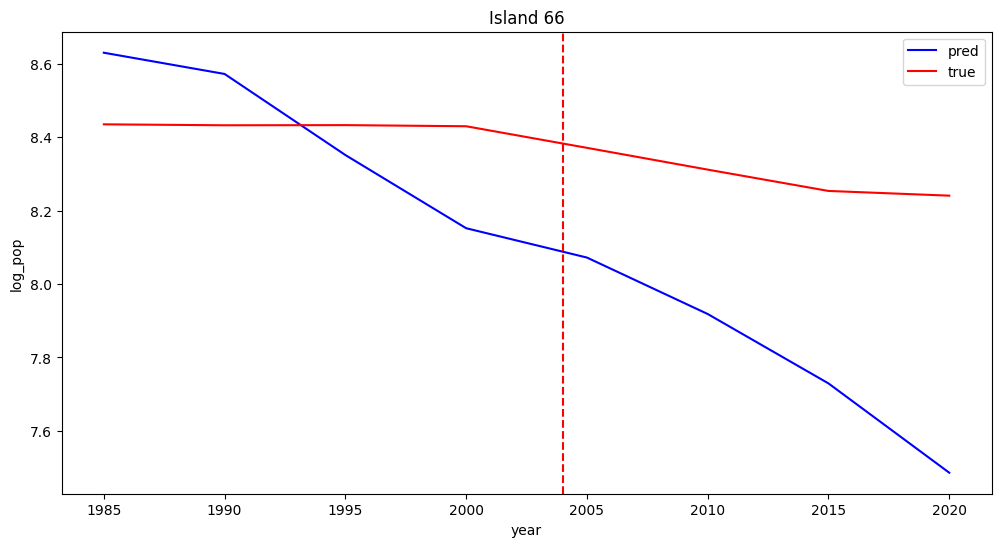

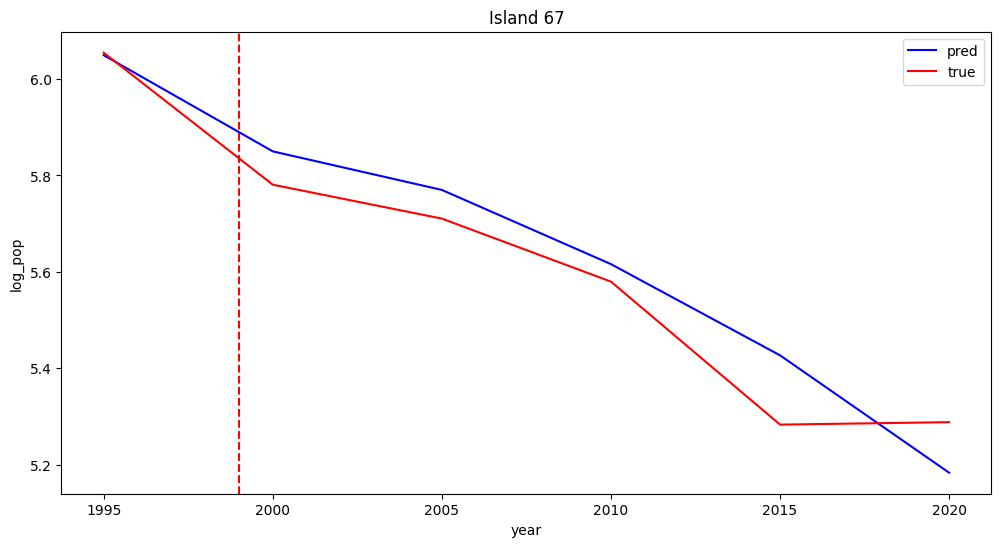

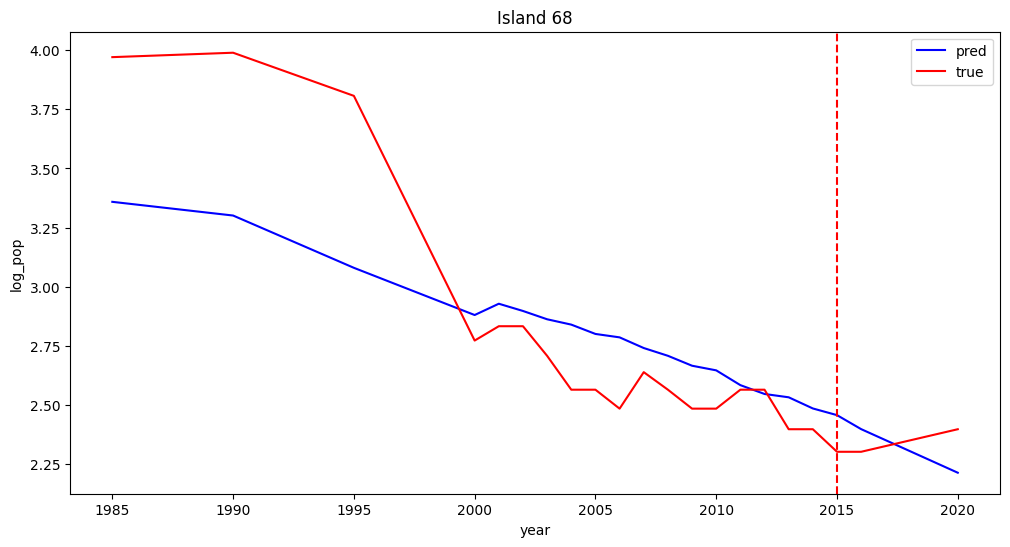

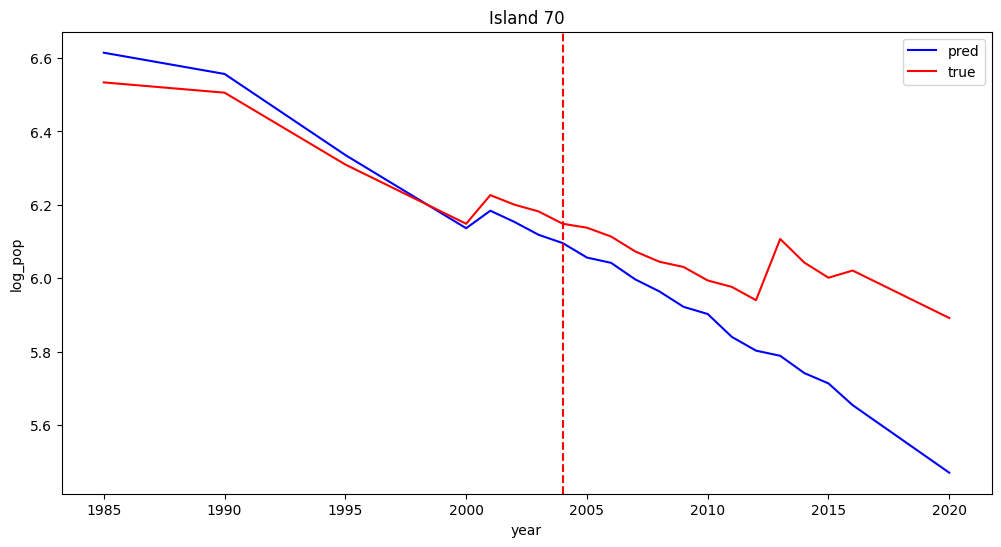

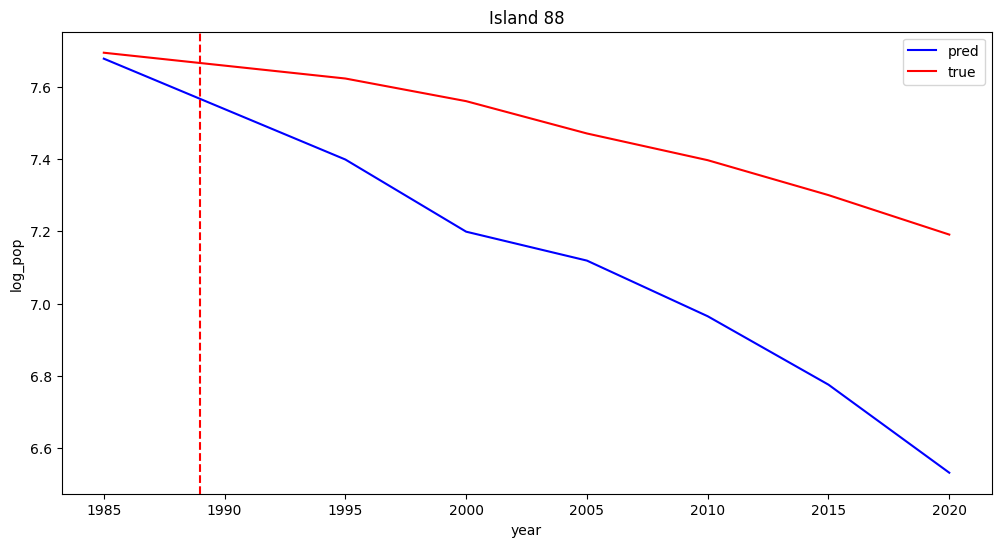

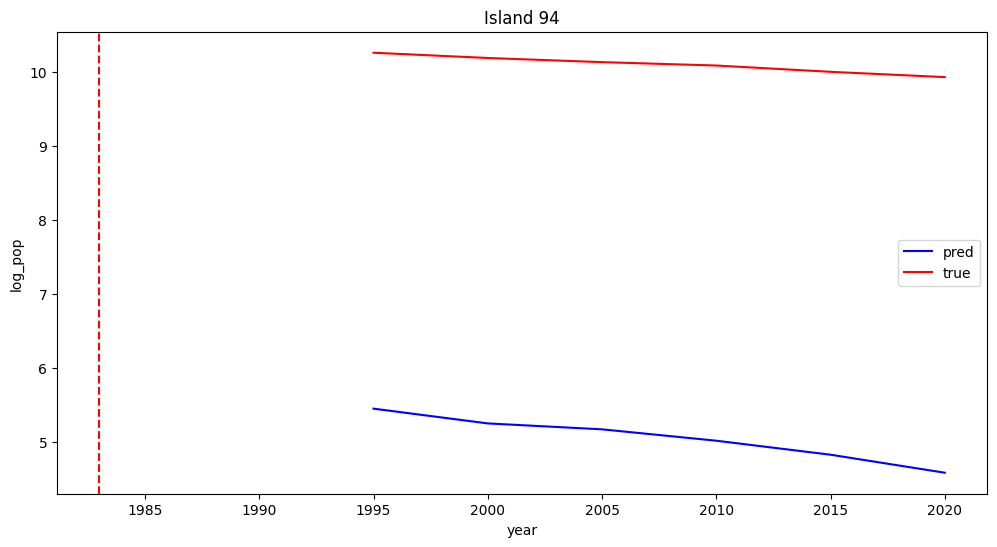

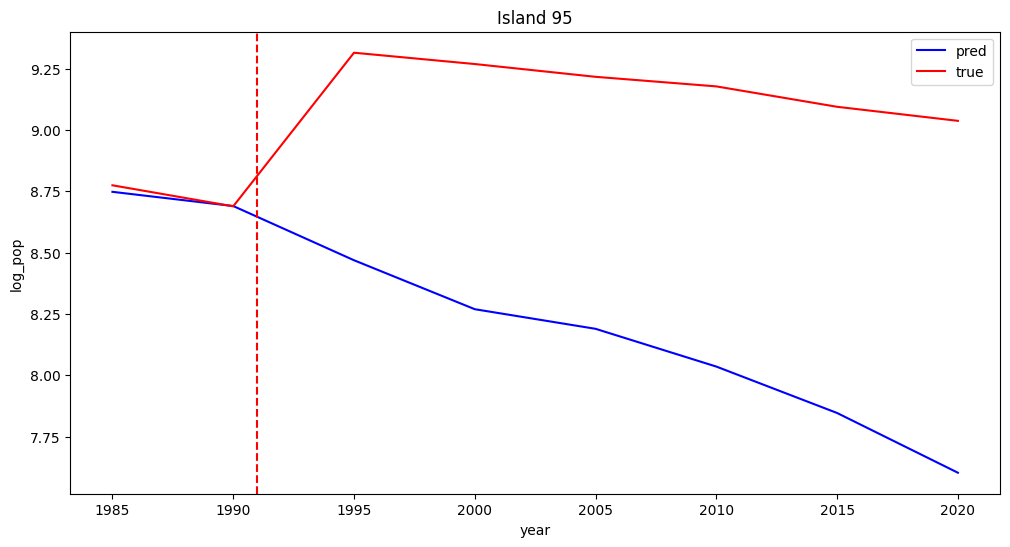

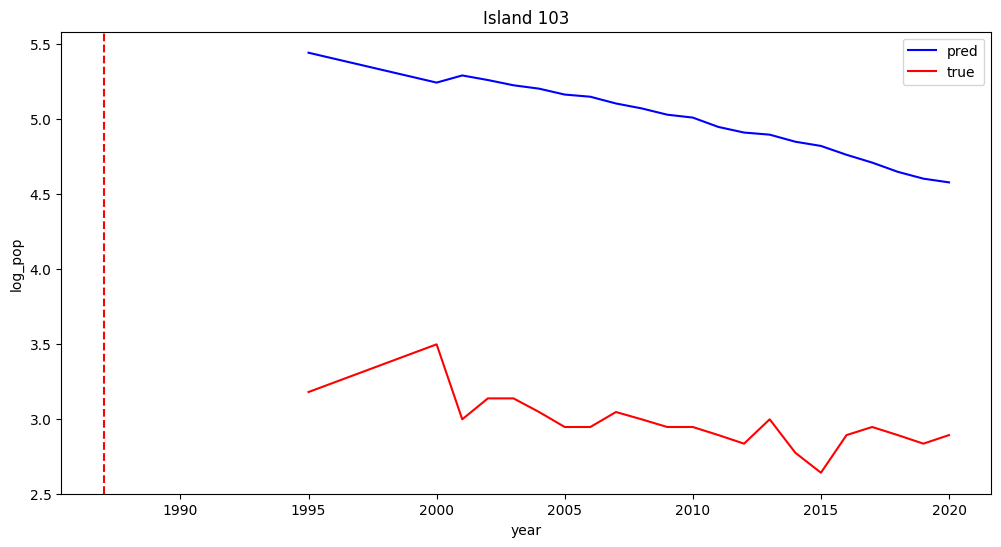

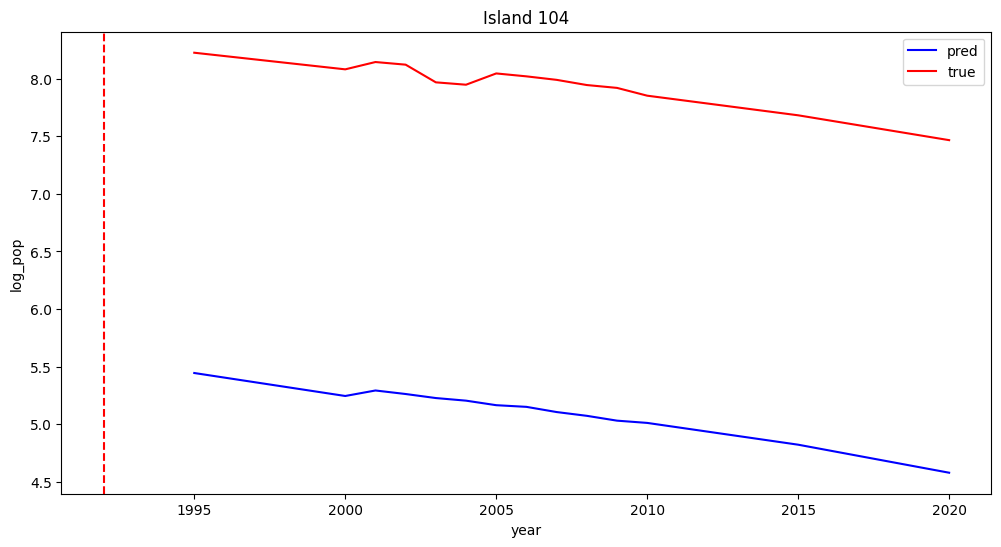

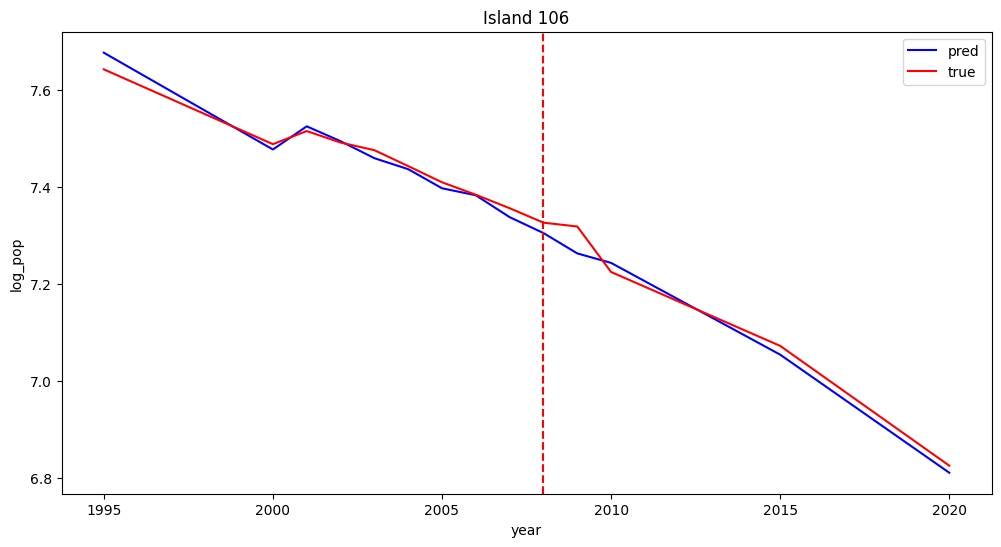

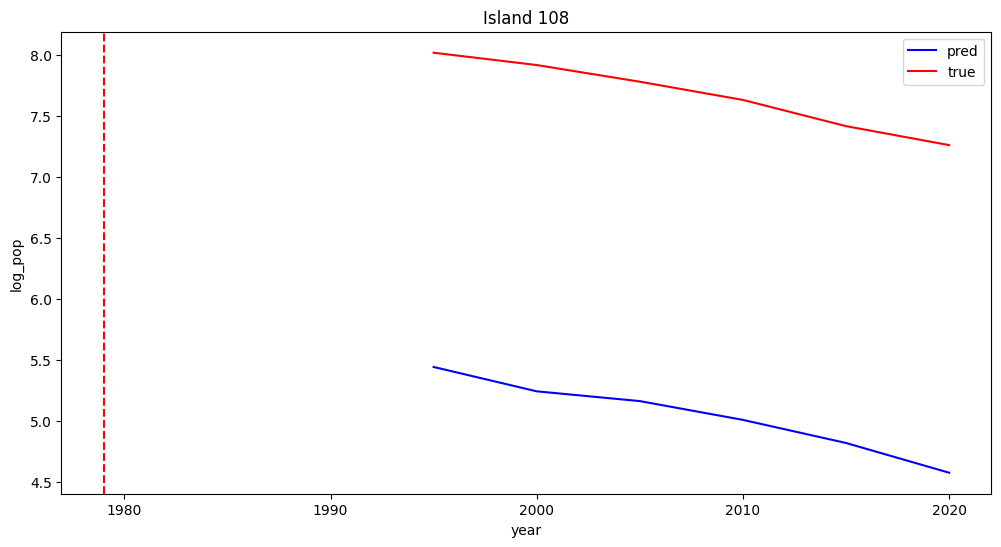

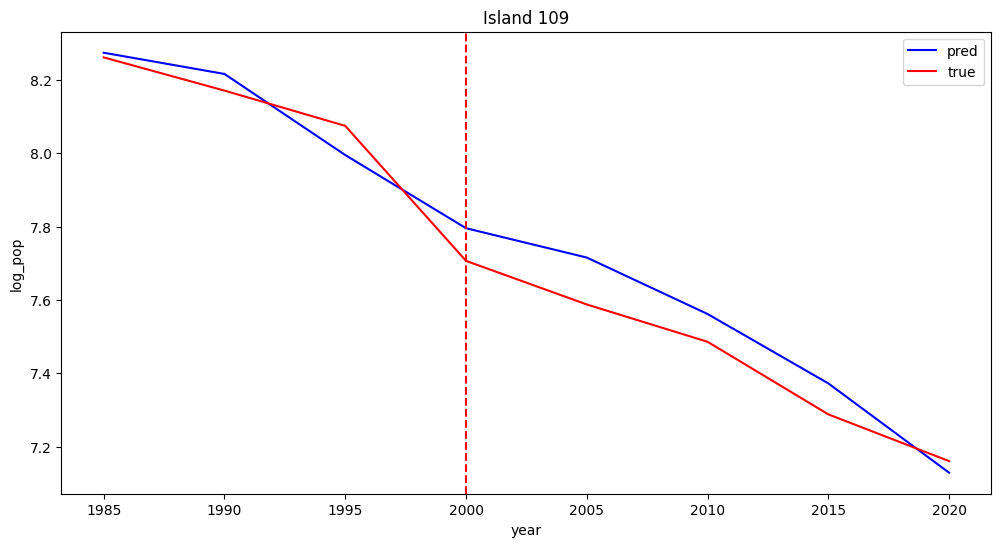

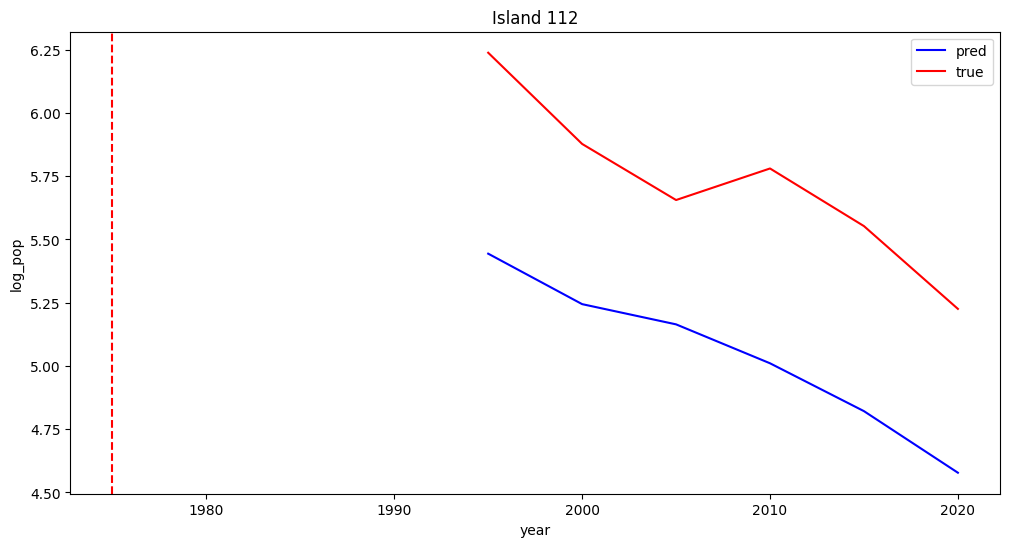

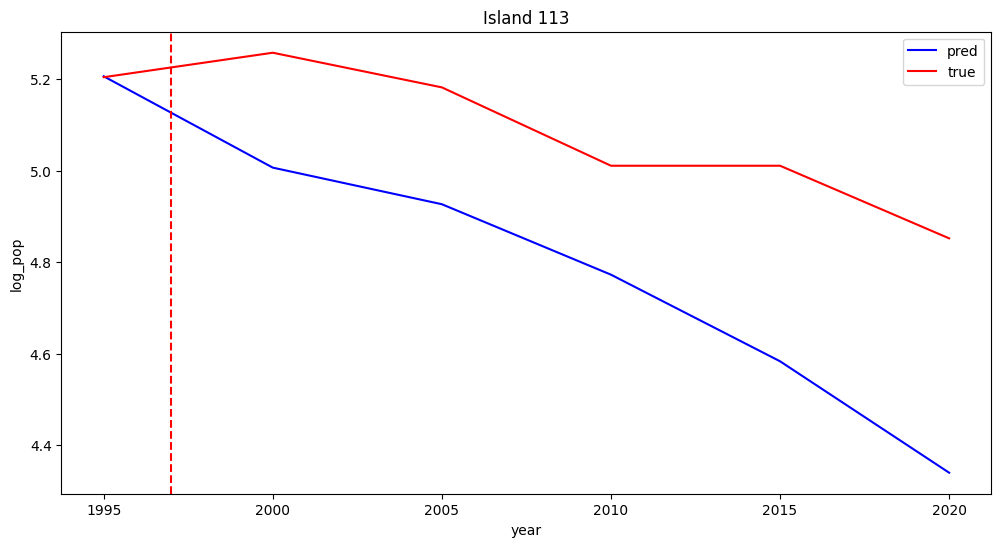

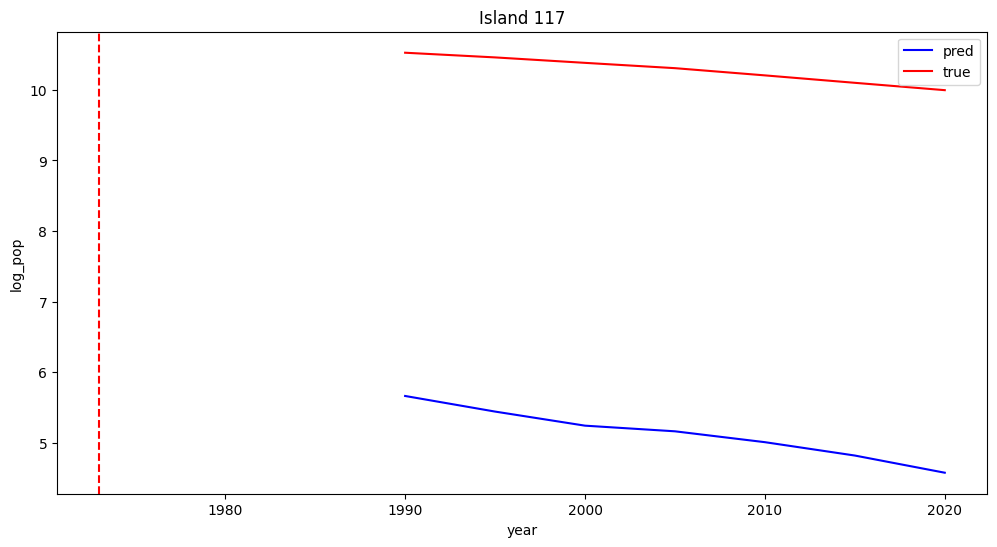

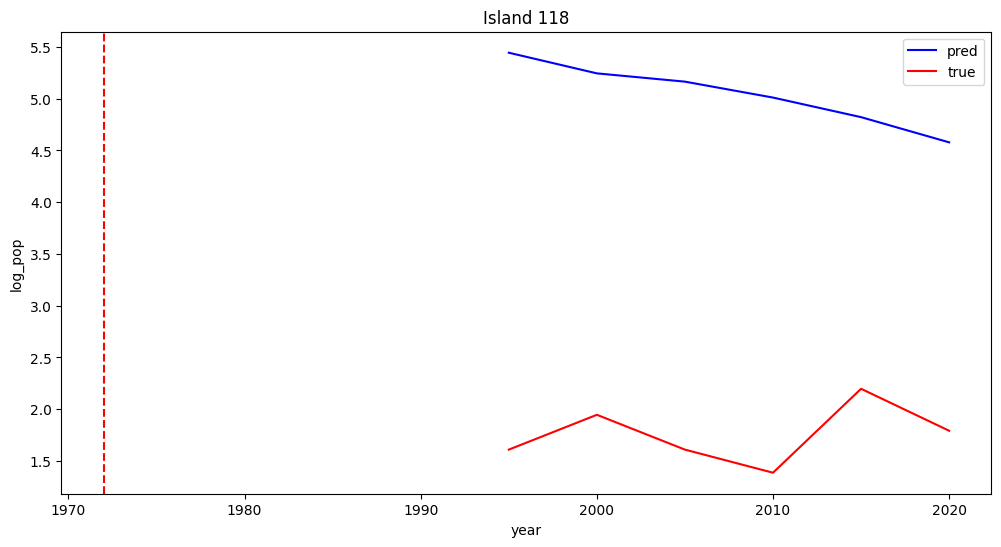

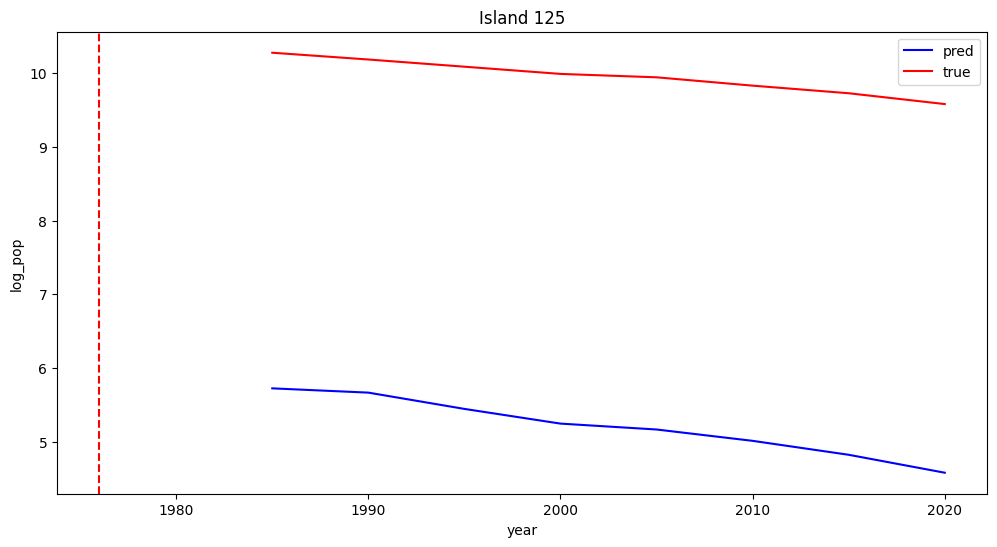

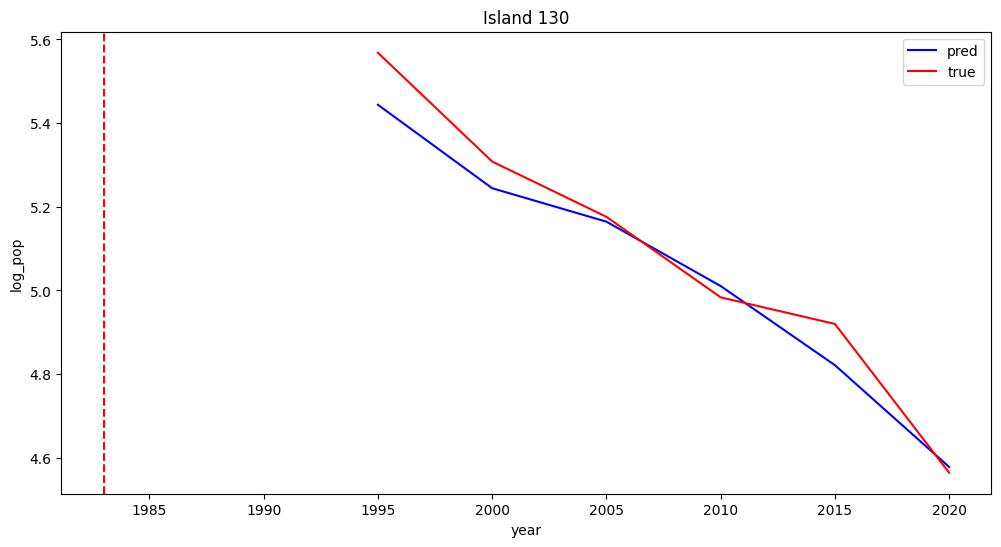

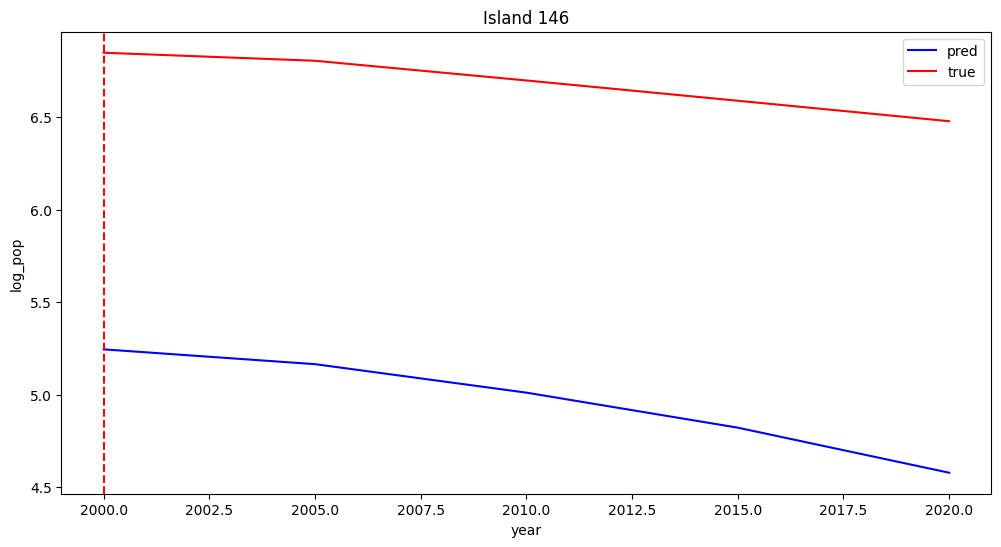

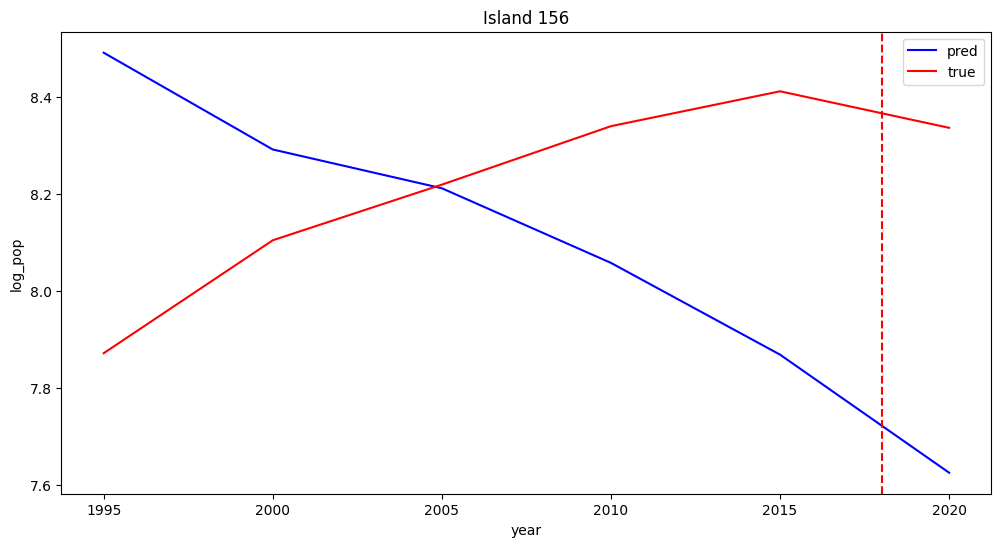

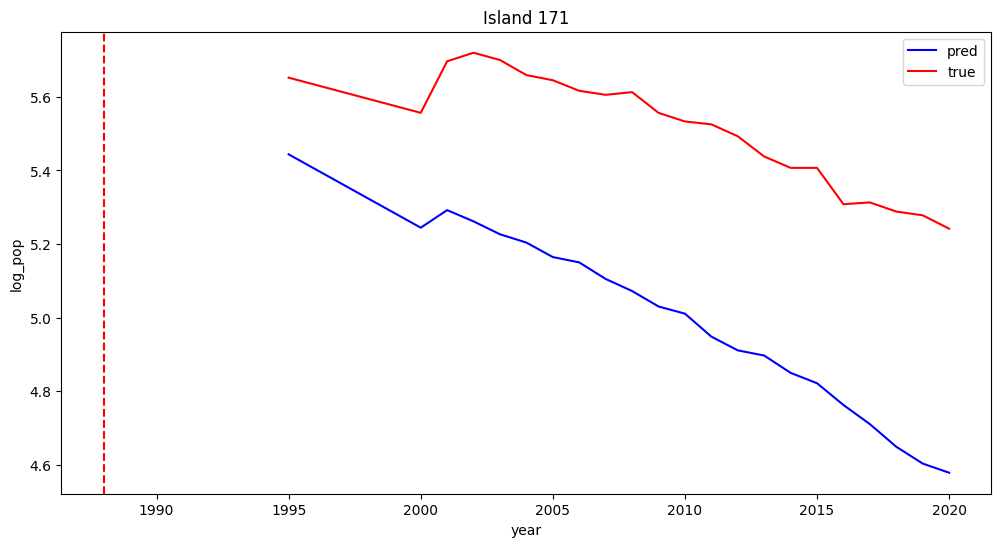

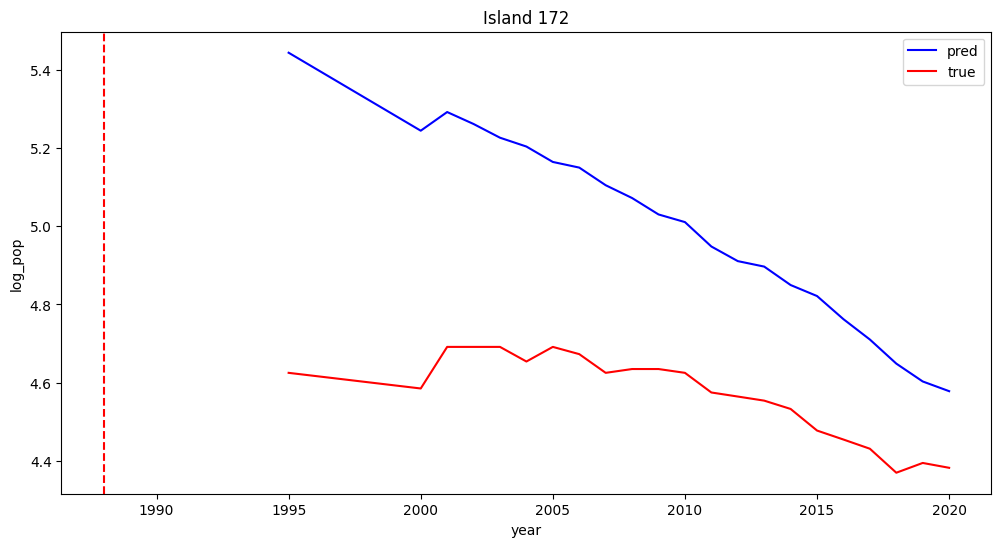

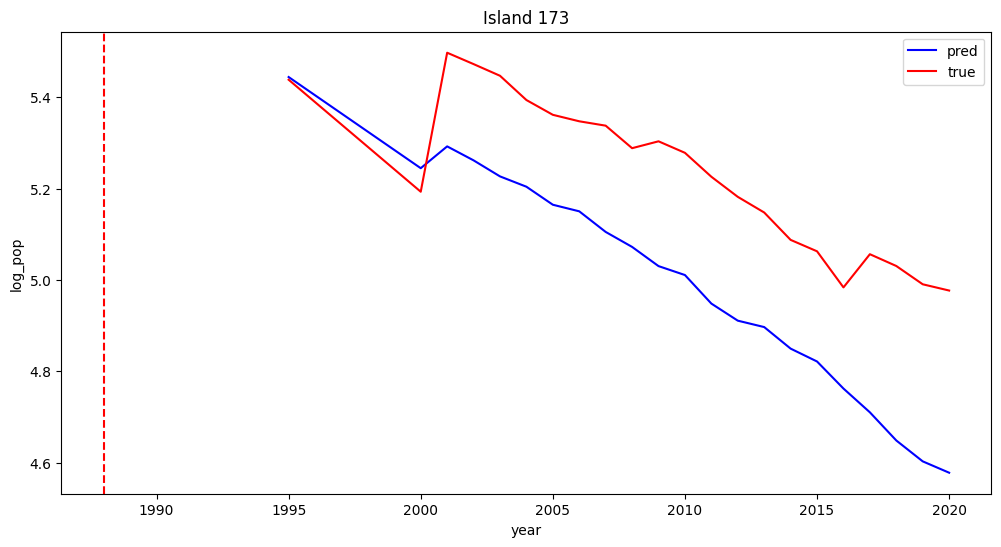

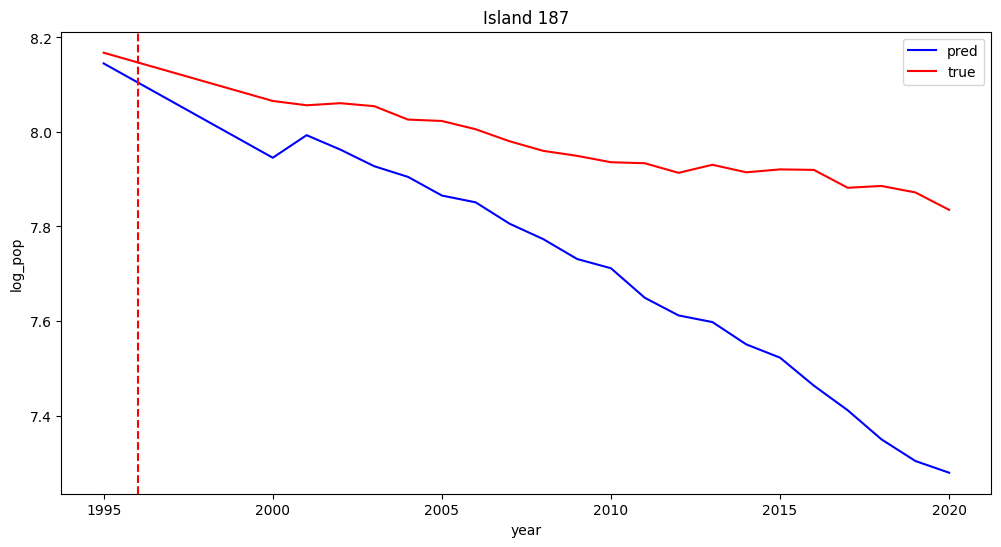

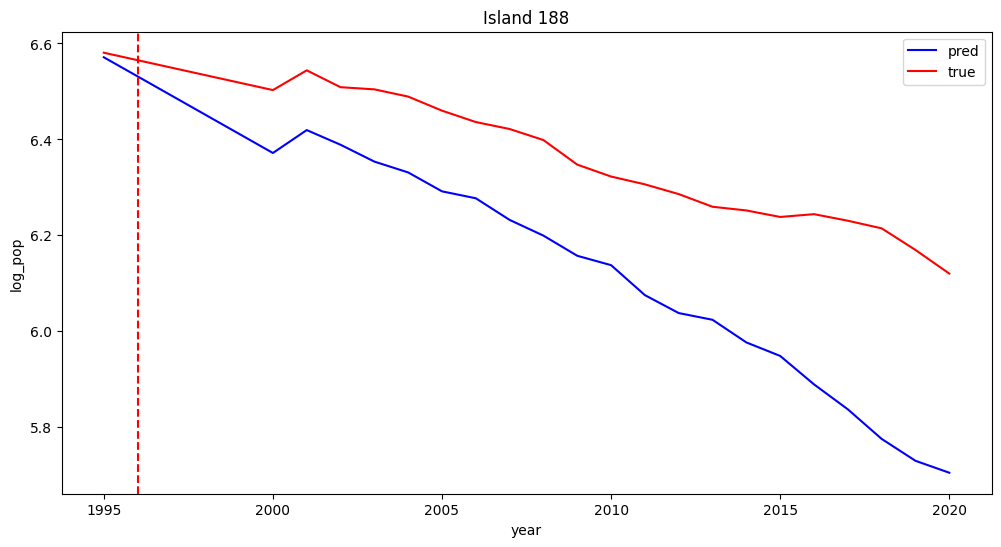

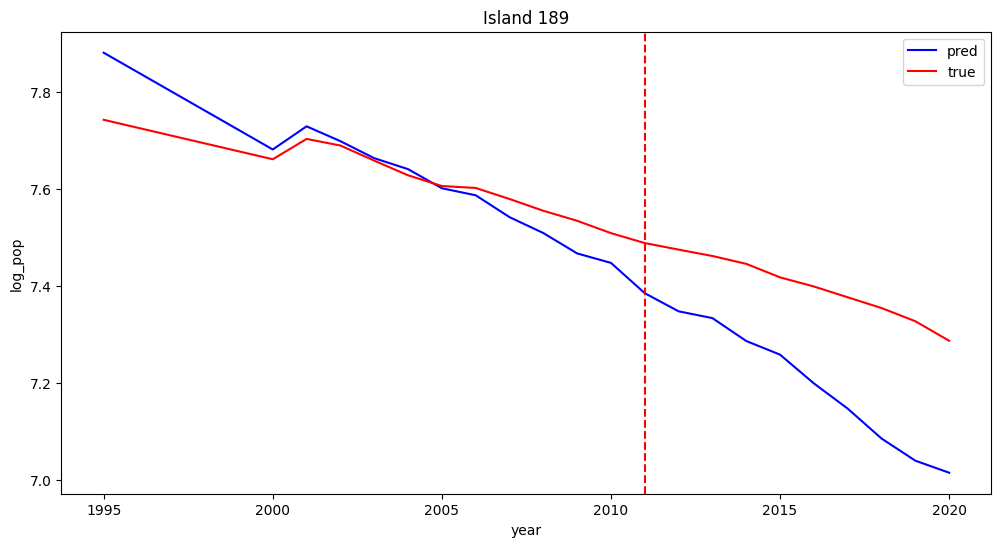

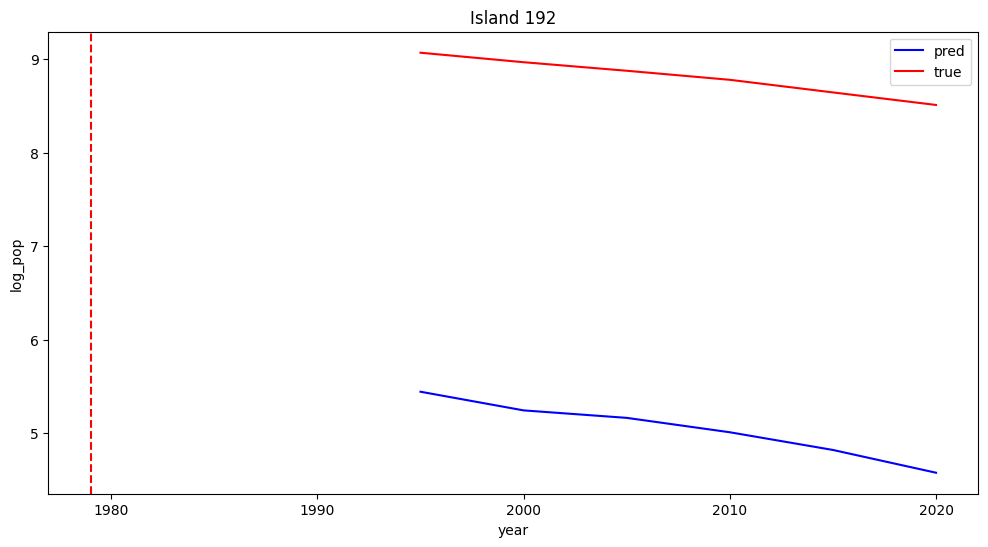

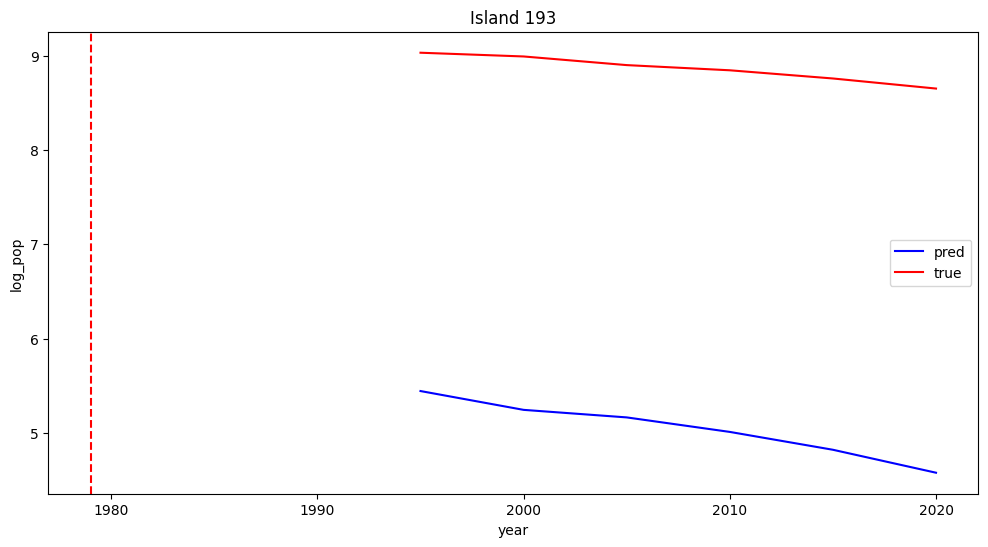

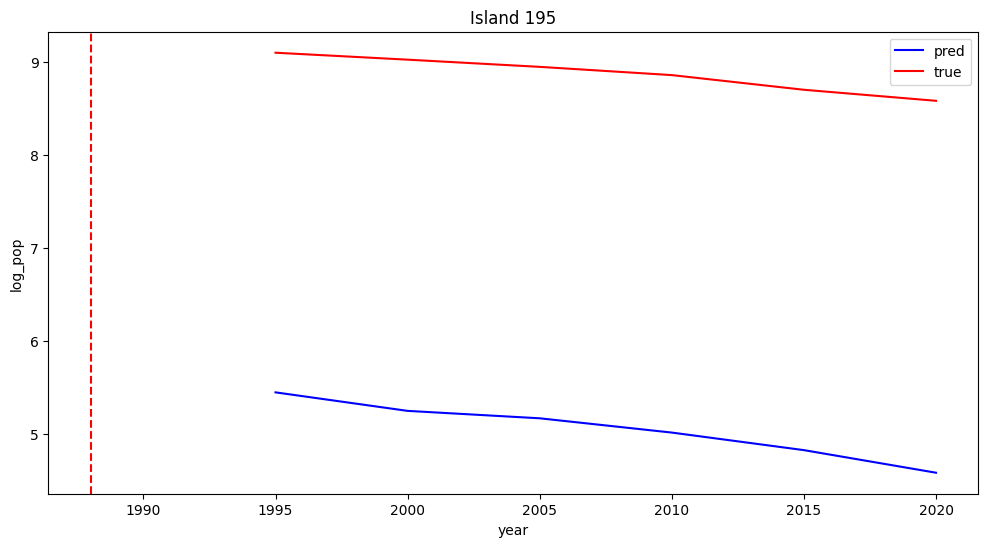

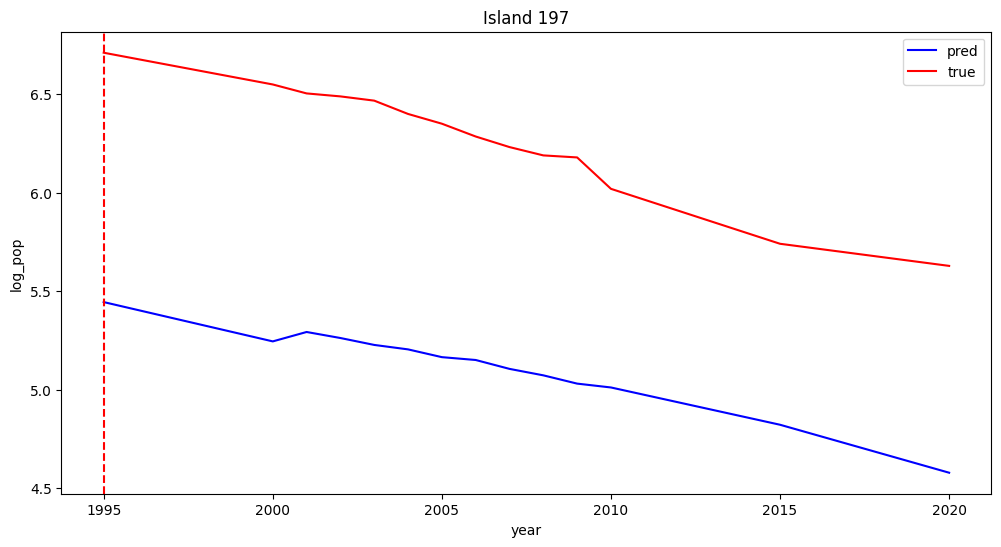

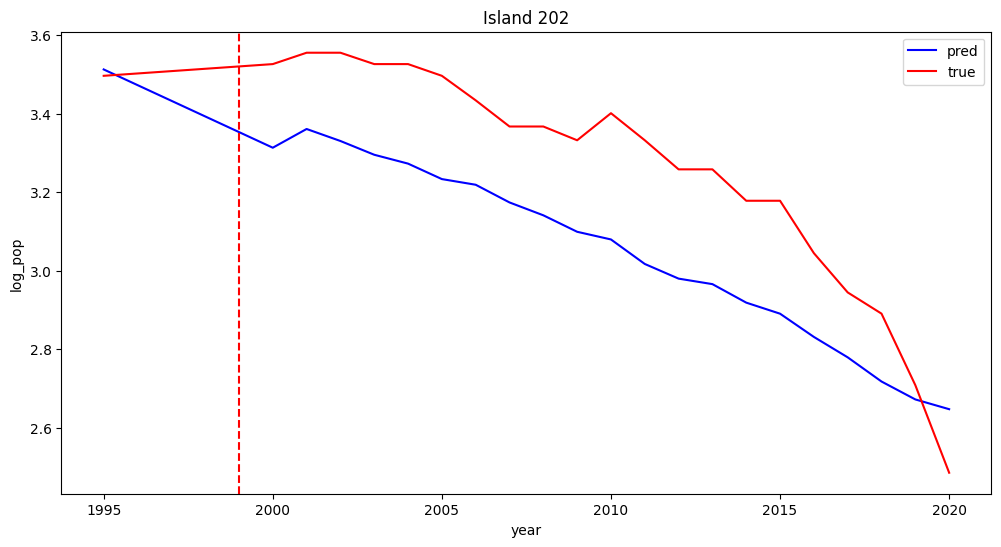

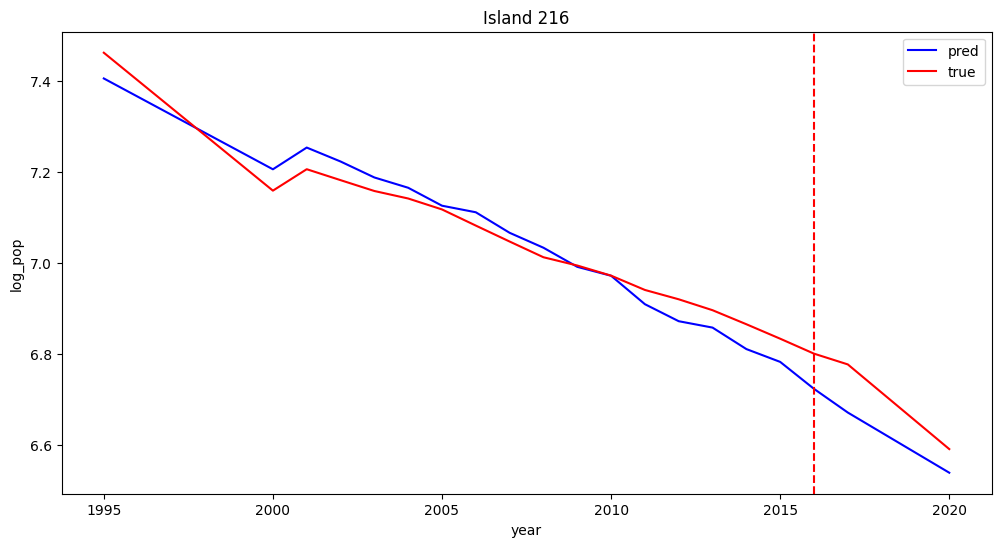

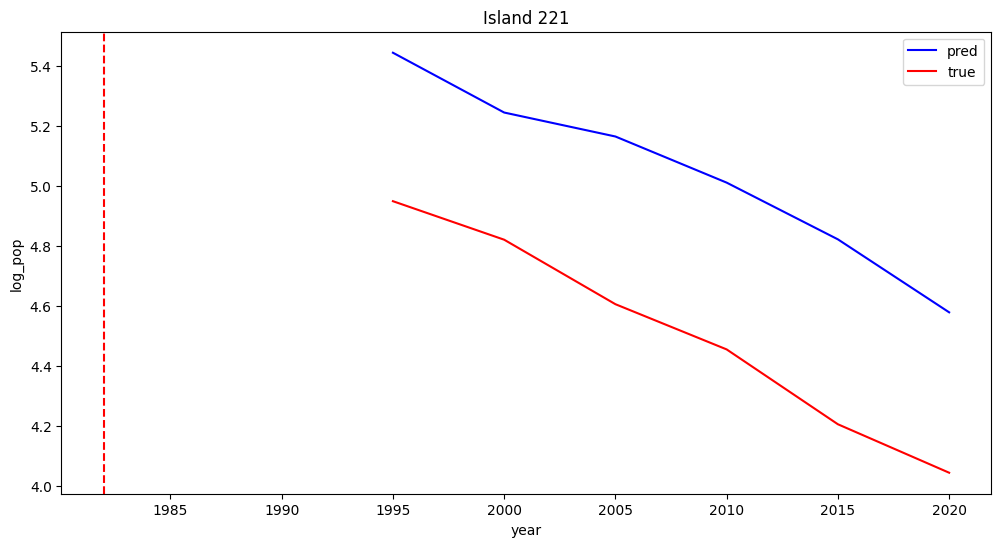

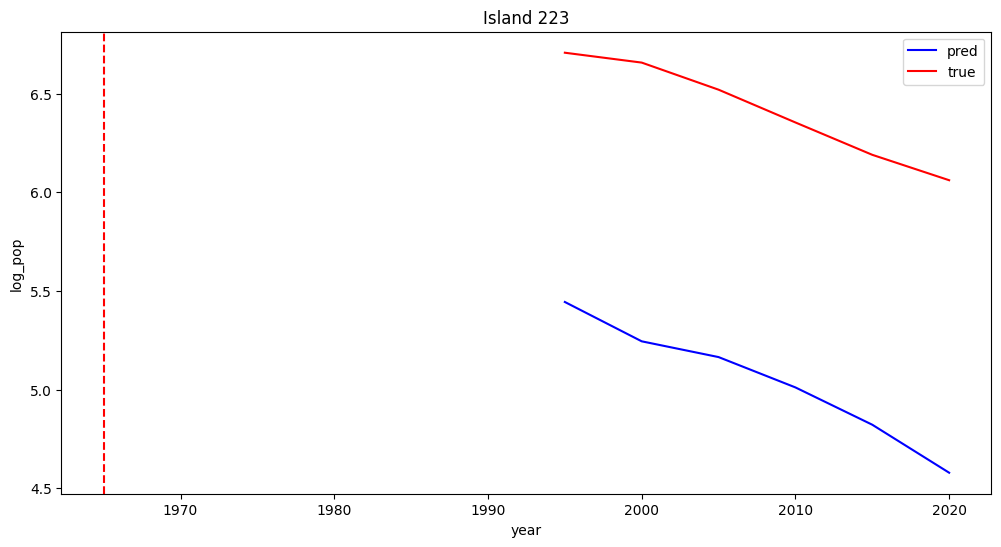

In [45]:
for island_id in treatment_df['island_ids'].unique():
    fig, ax = plt.subplots(figsize=(12, 6))
    sns.lineplot(x='year', y='pred', data=treatment_df[treatment_df['island_ids'] == island_id], label='pred', color='blue')
    sns.lineplot(x='year', y=treatment_df['log_pop'], data=treatment_df[treatment_df['island_ids'] == island_id], label='true', color='red')
    year = treatment_df['bridge_year'][treatment_df['island_ids'] == island_id].unique()
    ax.axvline(x=year, color='red', linestyle='--')

    plt.xlabel('year')
    plt.ylabel('log_pop')
    plt.title(f'Island {island_id}')
    plt.show()
